# Import Data

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\fatur\OneDrive\Dokumen\Papat\Data Analyst\Test\amazon_phone_data.csv")

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   asin                         306 non-null    object 
 1   product_title                306 non-null    object 
 2   product_price                306 non-null    object 
 3   product_original_price       4 non-null      object 
 4   currency                     306 non-null    object 
 5   product_star_rating          229 non-null    float64
 6   product_num_ratings          306 non-null    int64  
 7   product_url                  306 non-null    object 
 8   product_photo                306 non-null    object 
 9   product_num_offers           306 non-null    int64  
 10  product_minimum_offer_price  306 non-null    object 
 11  is_best_seller               306 non-null    bool   
 12  is_amazon_choice             306 non-null    bool   
 13  is_prime            

In [227]:
df.head()

,asin,product_title,product_price,product_original_price,currency,product_star_rating,product_num_ratings,product_url,product_photo,product_num_offers,...,product_availability,climate_pledge_friendly,sales_volume,delivery,has_variations,book_format,product_byline,product_badge,unit_price,unit_count
0,B0FQFN3STJ,Apple iPhone 17 Pro (256 GB) - Deep Blue,"S$1,749.00",NaN,SGD,3.8,11,https://www.amazon.sg/dp/B0FQFN3STJ,https://m.media-amazon.com/images/I/61LFeKye45...,1,...,NaN,False,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
1,B0FR5CF5NS,Samsung Galaxy S25 FE 5G SM-S731B Dual Sim 256...,S$799.00,NaN,SGD,4.7,36,https://www.amazon.sg/dp/B0FR5CF5NS,https://m.media-amazon.com/images/I/41H2NTNhCy...,1,...,NaN,False,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
2,B0FRS2S2J9,Samsung A07 LTE 4GB RAM 128GB Black,S$139.00,NaN,SGD,NaN,0,https://www.amazon.sg/dp/B0FRS2S2J9,https://m.media-amazon.com/images/I/41p7K2O9Cl...,2,...,NaN,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
3,B0F486WSZL,Xiaomi Redmi A5 Dual Sim 128GB Sandy Gold (4GB...,S$108.00,NaN,SGD,4.3,47,https://www.amazon.sg/dp/B0F486WSZL,https://m.media-amazon.com/images/I/41O7Lgd+Ej...,4,...,NaN,False,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
4,B0F1FRL5HX,SAMSUNG Galaxy A56 5G Android Smartphone 256GB...,S$468.00,NaN,SGD,4.6,1546,https://www.amazon.sg/dp/B0F1FRL5HX,https://m.media-amazon.com/images/I/616+oTRo6-...,1,...,NaN,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [228]:
# Create a copy of the original dataframe

df_copy = df.copy()

In [229]:
# Check for missing values in the copied dataframe

df_copy.isna().sum()

asin                             0
product_title                    0
product_price                    0
product_original_price         302
currency                         0
product_star_rating             77
product_num_ratings              0
product_url                      0
product_photo                    0
product_num_offers               0
product_minimum_offer_price      0
is_best_seller                   0
is_amazon_choice                 0
is_prime                         0
product_availability           306
climate_pledge_friendly          0
sales_volume                   306
delivery                       306
has_variations                   0
book_format                    290
product_byline                 288
product_badge                  304
unit_price                     304
unit_count                     304
dtype: int64

In [230]:
# Drop unnecessary columns from the copied dataframe

df_copy.drop(['product_minimum_offer_price', 'unit_price', 'unit_count', 'sales_volume', 'is_amazon_choice', 'is_prime', 'has_variations', 'product_byline', 'product_badge', 'product_original_price', 'product_url', 'product_photo', 'climate_pledge_friendly', 'delivery', 'product_availability', 'book_format'], axis=1, inplace=True)
df_copy.head()

,asin,product_title,product_price,currency,product_star_rating,product_num_ratings,product_num_offers,is_best_seller
0,B0FQFN3STJ,Apple iPhone 17 Pro (256 GB) - Deep Blue,"S$1,749.00",SGD,3.8,11,1,True
1,B0FR5CF5NS,Samsung Galaxy S25 FE 5G SM-S731B Dual Sim 256...,S$799.00,SGD,4.7,36,1,True
2,B0FRS2S2J9,Samsung A07 LTE 4GB RAM 128GB Black,S$139.00,SGD,NaN,0,2,True
3,B0F486WSZL,Xiaomi Redmi A5 Dual Sim 128GB Sandy Gold (4GB...,S$108.00,SGD,4.3,47,4,True
4,B0F1FRL5HX,SAMSUNG Galaxy A56 5G Android Smartphone 256GB...,S$468.00,SGD,4.6,1546,1,True


In [231]:
# Check for duplicates
df_copy.duplicated().any()

np.False_

In [232]:
# View duplicates based on 'asin' column
df_copy[df_copy.duplicated(subset=['asin'])]

,asin,product_title,product_price,currency,product_star_rating,product_num_ratings,product_num_offers,is_best_seller


In [233]:
# Check sum of missing values
df_copy.isna().sum()

asin                    0
product_title           0
product_price           0
currency                0
product_star_rating    77
product_num_ratings     0
product_num_offers      0
is_best_seller          0
dtype: int64

In [234]:
# View rows with missing 'product_star_rating' values
df_copy[df_copy['product_star_rating'].isnull()].head()

,asin,product_title,product_price,currency,product_star_rating,product_num_ratings,product_num_offers,is_best_seller
2,B0FRS2S2J9,Samsung A07 LTE 4GB RAM 128GB Black,S$139.00,SGD,NaN,0,2,True
7,B0DNDQN1Y7,Samsung Galaxy A16 SM-A165F Dual Sim 128GB Gra...,S$204.99,SGD,NaN,0,1,True
12,B0F2Y45Q3M,Samsung Galaxy A56 Awesome Olive 12+256GB 5G (...,S$498.00,SGD,NaN,0,1,True
13,B0FRS27KGP,Samsung A07 LTE 4GB RAM 128GB Light Violet,S$144.00,SGD,NaN,0,2,True
14,B0FH4QC8TG,Samsung Galaxy A06 5G SM-A066B Dual Sim 128GB ...,S$168.00,SGD,NaN,0,1,True


In [235]:
# Create a new column to indicate missing ratings (flagging)

df_copy['is_rating_missing'] = df_copy['product_star_rating'].isnull()
df_copy.head()

,asin,product_title,product_price,currency,product_star_rating,product_num_ratings,product_num_offers,is_best_seller,is_rating_missing
0,B0FQFN3STJ,Apple iPhone 17 Pro (256 GB) - Deep Blue,"S$1,749.00",SGD,3.8,11,1,True,False
1,B0FR5CF5NS,Samsung Galaxy S25 FE 5G SM-S731B Dual Sim 256...,S$799.00,SGD,4.7,36,1,True,False
2,B0FRS2S2J9,Samsung A07 LTE 4GB RAM 128GB Black,S$139.00,SGD,NaN,0,2,True,True
3,B0F486WSZL,Xiaomi Redmi A5 Dual Sim 128GB Sandy Gold (4GB...,S$108.00,SGD,4.3,47,4,True,False
4,B0F1FRL5HX,SAMSUNG Galaxy A56 5G Android Smartphone 256GB...,S$468.00,SGD,4.6,1546,1,True,False


In [236]:
# Count unique product titles
df_copy['product_title'].nunique()

306

In [237]:
# Define known brands and types
brands = ['Samsung', 'Apple', 'Xiaomi', 'Oppo', 'Vivo', 'Realme', 'Huawei', 'OnePlus', 'Nokia', 'Motorola', 'Infinix', 'Tecno', 'Asus',
          'Lenovo', 'Sony', 'Google', 'Honor', 'LG', 'HTC', 'ZTE', 'Alcatel', 'Meizu', 'Micromax',
          'Lava', 'Panasonic', 'TCL', 'Coolpad', 'Gionee', 'iQOO', 'Philips', 'Itel', 'Intex']

# Mapping of product types to brands
type_to_brand = {
    'Galaxy': 'Samsung',
    'iPhone': 'Apple',
    'Redmi': 'Xiaomi',
    'Mate': 'Huawei',
    'Pixel': 'Google',
    'ThinkPad': 'Lenovo',
    'Zenfone': 'Asus',
    'Lumia': 'Nokia',
    'Razr': 'Motorola'

}

# Function to extract brand from product title
def extract_brand(title):
    # Check for known brands first
    for b in brands:
        if b.lower() in title.lower():
            return b
    # Check for types associated with brands
    for t, b in type_to_brand.items():
        if t.lower() in title.lower():
            return b
    return 'Others'

# Apply the function to create a new 'brand' column
df_copy['brand'] = df_copy['product_title'].apply(extract_brand)
df_copy.head()

,asin,product_title,product_price,currency,product_star_rating,product_num_ratings,product_num_offers,is_best_seller,is_rating_missing,brand
0,B0FQFN3STJ,Apple iPhone 17 Pro (256 GB) - Deep Blue,"S$1,749.00",SGD,3.8,11,1,True,False,Apple
1,B0FR5CF5NS,Samsung Galaxy S25 FE 5G SM-S731B Dual Sim 256...,S$799.00,SGD,4.7,36,1,True,False,Samsung
2,B0FRS2S2J9,Samsung A07 LTE 4GB RAM 128GB Black,S$139.00,SGD,NaN,0,2,True,True,Samsung
3,B0F486WSZL,Xiaomi Redmi A5 Dual Sim 128GB Sandy Gold (4GB...,S$108.00,SGD,4.3,47,4,True,False,Xiaomi
4,B0F1FRL5HX,SAMSUNG Galaxy A56 5G Android Smartphone 256GB...,S$468.00,SGD,4.6,1546,1,True,False,Samsung


In [238]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   asin                 306 non-null    object 
 1   product_title        306 non-null    object 
 2   product_price        306 non-null    object 
 3   currency             306 non-null    object 
 4   product_star_rating  229 non-null    float64
 5   product_num_ratings  306 non-null    int64  
 6   product_num_offers   306 non-null    int64  
 7   is_best_seller       306 non-null    bool   
 8   is_rating_missing    306 non-null    bool   
 9   brand                306 non-null    object 
dtypes: bool(2), float64(1), int64(2), object(5)
memory usage: 19.9+ KB


In [239]:
# Clean 'product_price' column and convert to float

df_copy['product_price'] = (
    df_copy['product_price']
    .str.replace("S\$", "", regex=True)
    .str.replace(",", "", regex=False)
    .astype(float)
)

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   asin                 306 non-null    object 
 1   product_title        306 non-null    object 
 2   product_price        306 non-null    float64
 3   currency             306 non-null    object 
 4   product_star_rating  229 non-null    float64
 5   product_num_ratings  306 non-null    int64  
 6   product_num_offers   306 non-null    int64  
 7   is_best_seller       306 non-null    bool   
 8   is_rating_missing    306 non-null    bool   
 9   brand                306 non-null    object 
dtypes: bool(2), float64(2), int64(2), object(4)
memory usage: 19.9+ KB


<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
C:\Users\fatur\AppData\Local\Temp\ipykernel_26416\2177298363.py:5: SyntaxWarning: invalid escape sequence '\$'
  .str.replace("S\$", "", regex=True)


In [240]:

# list of keywords
phone_keywords = [
    "phone", "iphone", "galaxy", "samsung", "pixel", "xiaomi", 
    "redmi", "oppo", "vivo", "realme", "honor", "oneplus", 
    "huawei", "nokia", "lenovo", "zenfone"
]
# list of keywords
network_keywords = ["5g", "4g", "lte"]
# list of keywords
memory_keywords = ["gb", "ram", "rom"]
# list of negative keywords
not_phone_keywords = [
    "case", "cover", "protector", "charger", "cable",
    "earbuds", "headphone", "watch", "tablet", "ipad",
    "strap", "screen protector", "wireless charger"
]
# function to determine if a product is a phone
def is_phone(title):
    t = title.lower()

    # Negative keywords override everything
    if any(nk in t for nk in not_phone_keywords):
        return False

    score = 0

    # Positive signals
    if any(k in t for k in phone_keywords):
        score += 1
    if any(nk in t for nk in network_keywords):
        score += 1
    if any(mk in t for mk in memory_keywords):
        score += 1
    if "dual sim" in t:
        score += 1

    # Threshold-based classification
    return score >= 2

# Apply the function to create 'is_phone' column
df_copy["is_phone"] = df_copy["product_title"].apply(is_phone)
df_copy.head()


,asin,product_title,product_price,currency,product_star_rating,product_num_ratings,product_num_offers,is_best_seller,is_rating_missing,brand,is_phone
0,B0FQFN3STJ,Apple iPhone 17 Pro (256 GB) - Deep Blue,1749.0,SGD,3.8,11,1,True,False,Apple,True
1,B0FR5CF5NS,Samsung Galaxy S25 FE 5G SM-S731B Dual Sim 256...,799.0,SGD,4.7,36,1,True,False,Samsung,True
2,B0FRS2S2J9,Samsung A07 LTE 4GB RAM 128GB Black,139.0,SGD,NaN,0,2,True,True,Samsung,True
3,B0F486WSZL,Xiaomi Redmi A5 Dual Sim 128GB Sandy Gold (4GB...,108.0,SGD,4.3,47,4,True,False,Xiaomi,True
4,B0F1FRL5HX,SAMSUNG Galaxy A56 5G Android Smartphone 256GB...,468.0,SGD,4.6,1546,1,True,False,Samsung,True


In [241]:
# Count the number of phones
df_copy.value_counts('is_phone')

is_phone
False    168
True     138
Name: count, dtype: int64

# Exploratory Data : Focus on Phones Category

In [242]:
# Filtering phone products only

df = df_copy[df_copy['is_phone'] == True].reset_index(drop=True)

# Check for duplicates based on 'asin' column
df.duplicated(subset=['asin']).sum()

''' There are no duplicate phone product records based on the 'asin' column.  '''

" There are no duplicate phone product records based on the 'asin' column.  "

In [243]:
print(df.describe())

'''
The range between the minimum and maximum prices is very large, indicating the presence of outliers in the product price data.
'''

       product_price  product_star_rating  product_num_ratings  \
count     138.000000            83.000000           138.000000   
mean      566.062464             4.350602           129.869565   
std       503.404010             0.444581           468.564820   
min        24.410000             2.900000             0.000000   
25%       216.575000             4.000000             0.000000   
50%       403.620000             4.300000             2.000000   
75%       793.625000             4.600000            42.750000   
max      2878.000000             5.000000          4282.000000   

       product_num_offers  
count          138.000000  
mean             1.652174  
std              0.963965  
min              1.000000  
25%              1.000000  
50%              1.000000  
75%              2.000000  
max              5.000000  


'\nThe range between the minimum and maximum prices is very large, indicating the presence of outliers in the product price data.\n'

In [244]:
# Summary statistics

print("Total rows:", len(df))
print("Unique ASINs:", df['asin'].nunique())
print("Best-seller ratio:", len(df) / df['asin'].nunique())

df.head(5)

Total rows: 138
Unique ASINs: 138
Best-seller ratio: 1.0


,asin,product_title,product_price,currency,product_star_rating,product_num_ratings,product_num_offers,is_best_seller,is_rating_missing,brand,is_phone
0,B0FQFN3STJ,Apple iPhone 17 Pro (256 GB) - Deep Blue,1749.0,SGD,3.8,11,1,True,False,Apple,True
1,B0FR5CF5NS,Samsung Galaxy S25 FE 5G SM-S731B Dual Sim 256...,799.0,SGD,4.7,36,1,True,False,Samsung,True
2,B0FRS2S2J9,Samsung A07 LTE 4GB RAM 128GB Black,139.0,SGD,NaN,0,2,True,True,Samsung,True
3,B0F486WSZL,Xiaomi Redmi A5 Dual Sim 128GB Sandy Gold (4GB...,108.0,SGD,4.3,47,4,True,False,Xiaomi,True
4,B0F1FRL5HX,SAMSUNG Galaxy A56 5G Android Smartphone 256GB...,468.0,SGD,4.6,1546,1,True,False,Samsung,True


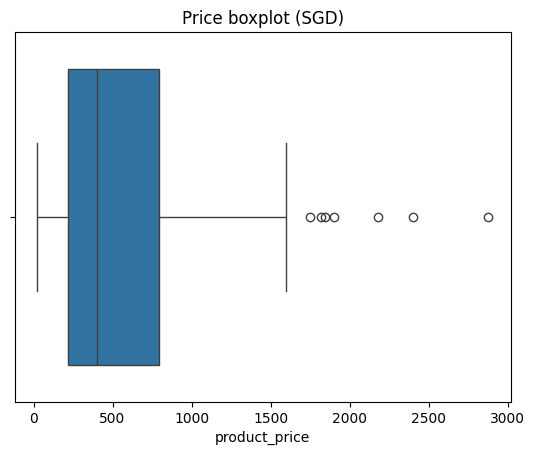

'\nThe boxplot shows the presence of outliers in the mobile phone price data.\nThese outliers represent very high prices (flagship phones) for several products compared to the prices of other products in general.\n'

In [245]:
# Price boxplot to identify outliers
sns.boxplot(x=df['product_price'])
plt.title('Price boxplot (SGD)')
plt.show()

'''
The boxplot shows the presence of outliers in the mobile phone price data.
These outliers represent very high prices (flagship phones) for several products compared to the prices of other products in general.
'''

### Which smartphone brand is the most searched on Amazon?

      brand  total_searched
0   Samsung              44
1    Xiaomi              30
2    Google              13
3      Oppo              11
4    Others              10
5     Honor               7
6  Motorola               6
7     Apple               5
8   OnePlus               4
9     Nokia               4


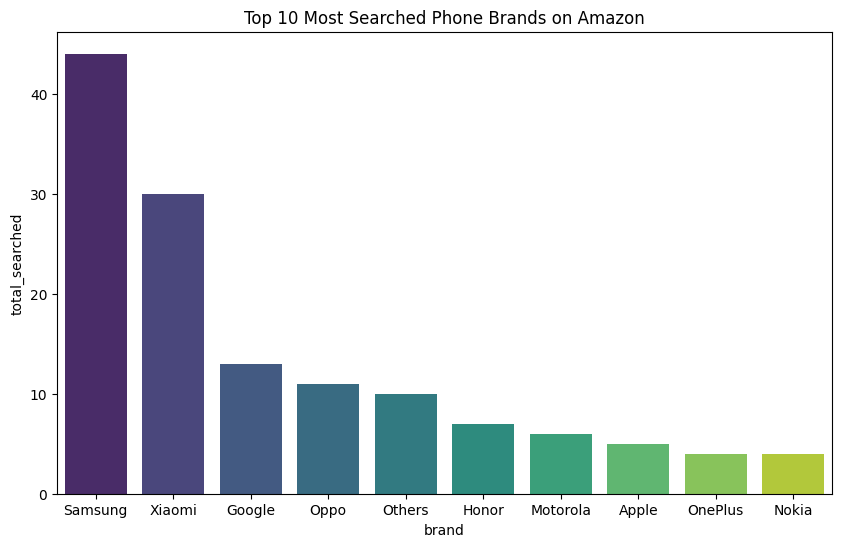

' Samsung and Xiaomi are the two most searched smartphone brands on Amazon, followed by Oppo. '

In [246]:
# Look at count of searches by brand

searched_by_brand = (
    df.groupby('brand')['asin'].count()
                .sort_values(ascending=False)
                .reset_index()
                .rename(columns={'asin' : 'total_searched'})
                .head(10)
)
print(searched_by_brand)

# Visualize top 10 most searched phone brands

plt.figure(figsize=(10,6))
sns.barplot(data=searched_by_brand, x='brand', y='total_searched', hue='brand', palette='viridis')
plt.title('Top 10 Most Searched Phone Brands on Amazon')
plt.show()

''' Samsung and Xiaomi are the two most searched smartphone brands on Amazon, followed by Oppo. '''

### What is the price range of the most searched smartphones on Amazon? Which brands are the most searched?

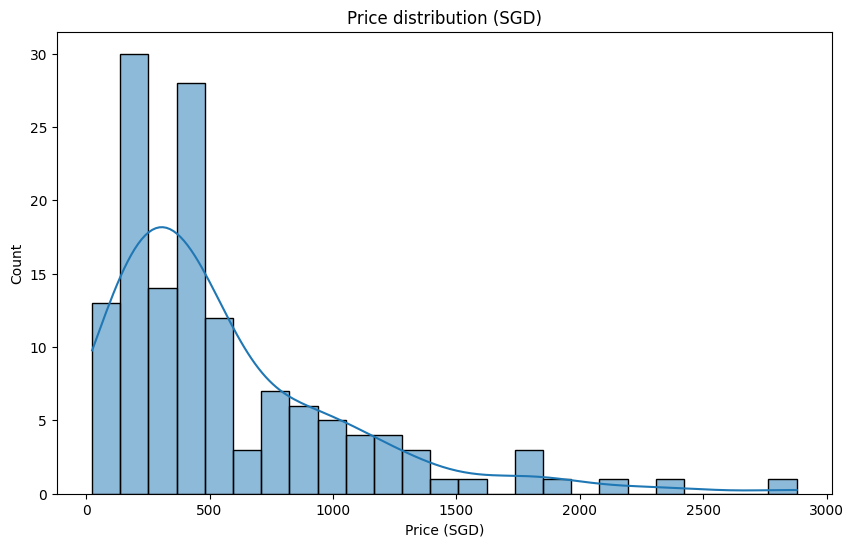

'\nBased on the price distribution above, the majority of smartphone products are priced below 600 SGD.\nTherefore, we will focus the further analysis on smartphones priced below 600 SGD.\n'

In [247]:
# Look at price distribution
plt.figure(figsize=(10,6))
sns.histplot(df['product_price'].dropna(), bins=25, kde=True)
plt.title('Price distribution (SGD)')
plt.xlabel('Price (SGD)')
plt.show()

"""
Based on the price distribution above, the majority of smartphone products are priced below 600 SGD.
Therefore, we will focus the further analysis on smartphones priced below 600 SGD.
"""

      brand  total_searched
0   Samsung              29
1    Xiaomi              24
2      Oppo              11
3    Others               9
4     Honor               6
5  Motorola               6
6     Nokia               4
7   OnePlus               3
8    Google               1
9    Huawei               1


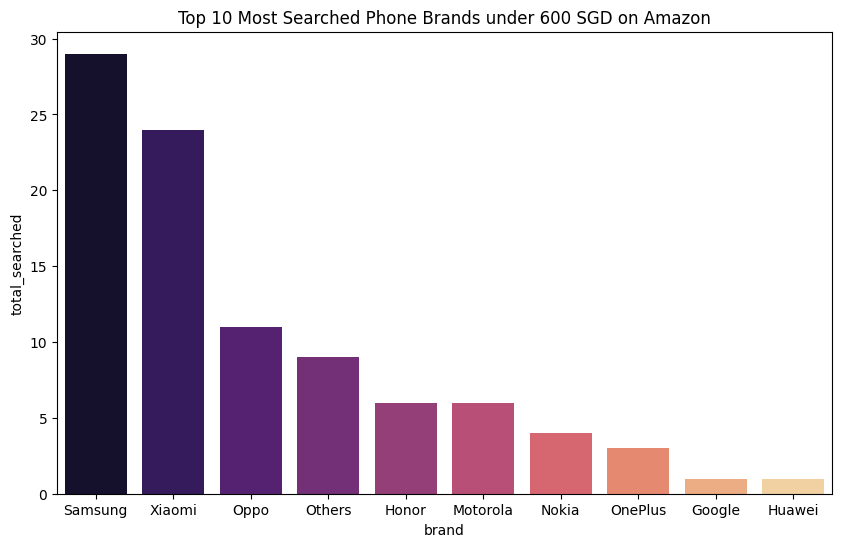

' Samsung, Xiaomi, and Oppo remain the three most searched smartphone brands on Amazon for products priced below 600 SGD. '

In [248]:
# Analyze brands for phones priced under 600 SGD

df_price_by_range = df[df['product_price'] <= 600]
df_price_under_600_count_by_brand = (
    df_price_by_range.groupby('brand')['asin'].count()
                    .sort_values(ascending=False)
                    .reset_index()
                    .rename(columns={'asin' : 'total_searched'})
)
print(df_price_under_600_count_by_brand.head(10))

# Visualize top 10 most searched phone brands under 600 SGD

plt.figure(figsize=(10,6))
sns.barplot(data=df_price_under_600_count_by_brand.head(10), x='brand', y='total_searched', hue='brand', palette='magma')
plt.title('Top 10 Most Searched Phone Brands under 600 SGD on Amazon')
plt.show()

''' Samsung, Xiaomi, and Oppo remain the three most searched smartphone brands on Amazon for products priced below 600 SGD. '''

### Does the phone’s price affect the rating given by users?

                     product_price  product_star_rating
product_price             1.000000            -0.011105
product_star_rating      -0.011105             1.000000


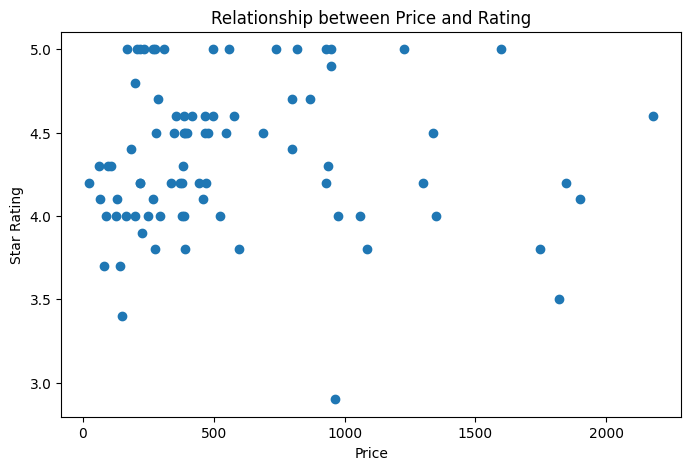

' There is no significant correlation between smartphone prices and star ratings. '

In [249]:
# Relationship between price and rating

#Choice only rows with non-null ratings
df_rate = df[df['product_star_rating'].notnull()]
corr = df_rate[['product_price', 'product_star_rating']].corr()
print(corr)

# Visualize relationship between price and rating
plt.figure(figsize=(8,5))
plt.scatter(df_rate['product_price'], df_rate['product_star_rating'])
plt.xlabel('Price')
plt.ylabel('Star Rating')
plt.title('Relationship between Price and Rating')
plt.show()

''' There is no significant correlation between smartphone prices and star ratings. '''

                     product_price  product_star_rating
product_price             1.000000             0.219642
product_star_rating       0.219642             1.000000


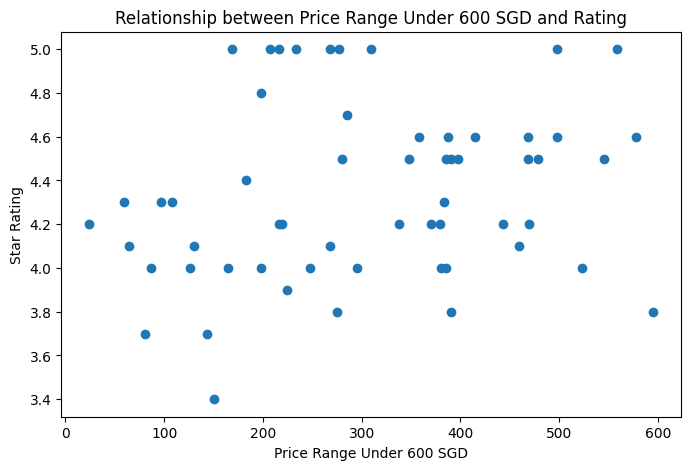

' There is no significant correlation between the prices of smartphones under 600 SGD and their star ratings. '

In [250]:
# Relationship between price under 600 SGD and rating

# Choice only rows with non-null ratings
df_range_rate = df_price_by_range[df_price_by_range['product_star_rating'].notnull()]
corr = df_range_rate[['product_price', 'product_star_rating']].corr()
print(corr)

# Visualize relationship between price under 600 SGD and rating
plt.figure(figsize=(8,5))
plt.scatter(df_range_rate['product_price'], df_range_rate['product_star_rating'])
plt.xlabel('Price Range Under 600 SGD')
plt.ylabel('Star Rating')
plt.title('Relationship between Price Range Under 600 SGD and Rating')
plt.show()

''' There is no significant correlation between the prices of smartphones under 600 SGD and their star ratings. '''

In [251]:
# Average rating by brand

avg_rating = (
    df_rate.groupby('brand')['product_star_rating']
           .mean()
           .sort_values(ascending=False)
           .reset_index()
           .rename(columns={'product_star_rating': 'average_rating'})
)

print(avg_rating.head(10))

''' Oppo has the highest average rating among smartphone brands, providing an indication of user expectations. '''

      brand  average_rating
0      Oppo        4.750000
1   Samsung        4.638462
2    Huawei        4.500000
3   OnePlus        4.500000
4     Apple        4.400000
5    Xiaomi        4.354167
6    Realme        4.300000
7    Others        4.255556
8    Google        4.225000
9  Motorola        4.183333


' Oppo has the highest average rating among smartphone brands, providing an indication of user expectations. '

# Insight

- Samsung and Xiaomi are the most frequently searched smartphone brands on Amazon Singapore, followed by Oppo.
- Most smartphone products are priced below 600 SGD, indicating a market that is strongly dominated by budget and mid-range devices.
- When focusing specifically on products priced under 600 SGD, Samsung, Xiaomi, and Oppo consistently remain the top three most-searched brands.
- There is no significant correlation between product price and star rating, meaning customer satisfaction (based on ratings) does not depend on how expensive the device is.
- The same pattern appears even when analyzing only smartphones under 600 SGD — price still does not influence rating.
- Brands with the highest average ratings can serve as a reference for customer expectations, especially regarding product reliability and user satisfaction.

# Recommendations

- Prioritize stocking and promoting Samsung and Xiaomi smartphones, as they dominate search interest and likely represent strong demand.
- Highlight mid-range smartphone options under 600 SGD, since this price segment makes up the majority of available products and aligns with consumer browsing behavior.
- For budget-conscious segments, promote mid-range Oppo and Xiaomi models, as they are frequently searched and competitively priced.
- Since price does not strongly influence ratings, emphasize product quality, features, and user reviews in marketing campaigns rather than focusing solely on pricing strategies.
- Leverage high-rated brands and models to build trust — for example by creating “Top Rated Phones Under 600 SGD” collections on product pages or online stores.
- Consider running A/B tests on messaging, such as feature-based vs. price-based promotional content, since consumers do not necessarily equate higher price with better satisfaction.